# H2O Automated Machine Learning (AutoML)

## 0 Introduction
The objective of this notbook is to use to data generated from the previous notebooks to carry out Automated Machine Learning (AutoML) and captrure the important features at the underlying structure of signal peptides. In order to achieve this, the predictions of SignalP algorithm will be merged with the observations of Proteomics results obtained from the previous two notebooks, respectively. This will enable the observed signal peptides to be assigned with peptide abundance, while keeping the predicted signal peptides at zero abundance, thus generating a dataframe that emphasizes importance of signal peptides through the peptide abundance. 

### Agenda
- Generate dataframe for AutoML
- Utilize AutoML to carry out ML operations
- Determine the best AutoML model generated
- Analyze the best model parameters 
- Check AutoML prediction based on the best model

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive 
drive.mount('/content/home')

Mounted at /content/home


## 1 ML dataframe generation

In [ ]:
0# Load the mean proteomcis dataset and common signal peptide dataset obtained from previous notebooks
df_proteomcis_abundance_means = pd.read_csv('/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/proteomics_mean_peptide_abundances.csv')
df_signalP_predictions = pd.read_excel('/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/sigpep_predict.xlsx')

In [ ]:
df_proteomcis_abundance_means

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized)
0,AO090003000935-T-p1,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923
1,AO090023000944-T-p1,250.433333,0.044270,53.733333,0.044270,2.632887e+08,0.025062,7.327970e+07,0.017628
2,AO090003001591-T-p1,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000
3,AO090005001300-T-p1,50.566667,0.080759,94.433333,0.080759,3.997800e+07,0.003882,9.707511e+07,0.024045
4,AO090010000746-T-p1,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331
...,...,...,...,...,...,...,...,...,...
860,AO090001000075-T-p1,110.200000,0.254802,310.600000,0.254802,1.013201e+05,0.000010,3.909362e+05,0.000090
861,AO090005001355-T-p1,105.400000,0.122683,184.200000,0.122683,3.984604e+04,0.000003,9.575187e+04,0.000015
862,AO090003000247-T-p1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
863,AO090001000680-T-p1,NaN,0.309596,389.333333,0.309596,NaN,NaN,9.818556e+04,0.000019


In [ ]:
df_signalP_predictions

,gene,start_pos,end_pos,signal_peptide_likelyhood,sequence
0,AO090005000016-T-p1,0,23,0.999803,MAPSHSFMLFLSVICTHLCSLVV
1,AO090005000029-T-p1,0,23,0.999835,MHLRNIVIALAATAVASPVDLQD
2,AO090005000042-T-p1,0,23,0.999843,MKASFISRLLSLTAFAISSNLSY
3,AO090005000053-T-p1,0,41,0.854809,MGLFLTALGALSSVNVLYSRGRMPLKHLATLLCALSPTVAL
4,AO090005000059-T-p1,0,18,0.999821,MHLQATLAVGLSLLGLTL
...,...,...,...,...,...
1056,AO090103000483-T-p1,0,19,0.833106,MKTSFLLAAIGFLYRLPCS
1057,AO090103000487-T-p1,0,19,0.999710,MTRYLSFLFLLILFGNSVF
1058,AO090103000493-T-p1,0,17,0.999791,MRGIVALSFLSVALGVT
1059,AO090701000994-T-p1,0,18,0.999845,MRLLLIAPLFSAVSYGAQ


In [ ]:
# Change the name to allow merge
df_signalP_predictions = df_signalP_predictions.rename(columns={'gene': 'Accession', 'end_pos': 'length'})

In [ ]:
df_signalP_predictions

,Accession,start_pos,length,signal_peptide_likelyhood,sequence
0,AO090005000016-T-p1,0,23,0.999803,MAPSHSFMLFLSVICTHLCSLVV
1,AO090005000029-T-p1,0,23,0.999835,MHLRNIVIALAATAVASPVDLQD
2,AO090005000042-T-p1,0,23,0.999843,MKASFISRLLSLTAFAISSNLSY
3,AO090005000053-T-p1,0,41,0.854809,MGLFLTALGALSSVNVLYSRGRMPLKHLATLLCALSPTVAL
4,AO090005000059-T-p1,0,18,0.999821,MHLQATLAVGLSLLGLTL
...,...,...,...,...,...
1056,AO090103000483-T-p1,0,19,0.833106,MKTSFLLAAIGFLYRLPCS
1057,AO090103000487-T-p1,0,19,0.999710,MTRYLSFLFLLILFGNSVF
1058,AO090103000493-T-p1,0,17,0.999791,MRGIVALSFLSVALGVT
1059,AO090701000994-T-p1,0,18,0.999845,MRLLLIAPLFSAVSYGAQ


In [ ]:
# Merge the dataframes
df_ML_signal_peptides = pd.merge(df_proteomcis_abundance_means, df_signalP_predictions, on='Accession', how='right')

# Set NaN values to zero
df_ML_signal_peptides.fillna(value=0, inplace=True)

# Create a new column that sorts the accession in a descending order to abundances observed in the raw data column
df_ML_signal_peptides['max_abundance'] = df_ML_signal_peptides[['MM mean abundances (Raw)', 'MM + Nitrogen mean abundances (Raw)']].max(axis=1)
df_ML_signal_peptides = df_ML_signal_peptides.sort_values(by='max_abundance', ascending=False)

df_ML_signal_peptides

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized),start_pos,length,signal_peptide_likelyhood,sequence,max_abundance
318,AO090003001591-T-p1,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000,0,20,0.999866,MMVAWWSLFLYGLQVAAPAL,1.047763e+10
269,AO090003000935-T-p1,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923,0,27,0.999834,MEAFNLHNFLSSLYILLPFVILANPVH,1.494872e+09
1020,AO090103000076-T-p1,0.700000,0.430035,472.900000,0.430035,1.496427e+06,0.000144,1.202415e+09,0.339312,0,18,0.999835,MLRVSAIFMACLLLATAA,1.202415e+09
401,AO090026000003-T-p1,0.833333,0.414383,470.100000,0.414383,1.498718e+06,0.000144,1.061096e+09,0.276919,0,24,0.848574,MAVRIARFLGLSTVAYLALANGID,1.061096e+09
1011,AO090010000746-T-p1,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331,0,24,0.999747,MVSFSSCLRALALGSSVLAVQPVL,8.634503e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,AO090026000252-T-p1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0,18,0.999834,MQVKLFYTLALWAPILVS,0.000000e+00
423,AO090026000257-T-p1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0,15,0.999809,MKSLIWALPFIPLAY,0.000000e+00
425,AO090026000367-T-p1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0,22,0.999847,MWPTRSLSSLFFLSLALGSPVS,0.000000e+00
427,AO090026000428-T-p1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0,22,0.999792,MLLPRLSSLLCLAGLATMPVAN,0.000000e+00


In [ ]:
# Change the name for simplicity
df_ML_signal_peptides  = df_ML_signal_peptides.rename(columns={'MM + Nitrogen mean abundances (Raw-Normalized)': 'abundance',})

# Isolate the desired columns from the dataframe
df_ML_signal_peptides = df_ML_signal_peptides[['sequence', 'length', 'abundance']]
df_ML_signal_peptides

,sequence,length,abundance
318,MMVAWWSLFLYGLQVAAPAL,20,1.000000
269,MEAFNLHNFLSSLYILLPFVILANPVH,27,0.417923
1020,MLRVSAIFMACLLLATAA,18,0.339312
401,MAVRIARFLGLSTVAYLALANGID,24,0.276919
1011,MVSFSSCLRALALGSSVLAVQPVL,24,0.218331
...,...,...,...
422,MQVKLFYTLALWAPILVS,18,0.000000
423,MKSLIWALPFIPLAY,15,0.000000
425,MWPTRSLSSLFFLSLALGSPVS,22,0.000000
427,MLLPRLSSLLCLAGLATMPVAN,22,0.000000


In [ ]:
# Convert and save a summary dataframe (.csv or .xlsx)
df_ML_signal_peptides.to_csv('/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/ML_signal_peptides.csv', index=False)

## 2 Data preparation for H2O AutoML

In [ ]:
# Load the dataframe generated in the previous notebook for AutoML operations
df_signalPP = pd.read_csv('/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/ML_signal_peptides.csv')
df_signalPP

,sequence,length,abundance
0,MMVAWWSLFLYGLQVAAPAL,20,1.000000
1,MEAFNLHNFLSSLYILLPFVILANPVH,27,0.417923
2,MLRVSAIFMACLLLATAA,18,0.339312
3,MAVRIARFLGLSTVAYLALANGID,24,0.276919
4,MVSFSSCLRALALGSSVLAVQPVL,24,0.218331
...,...,...,...
1056,MQVKLFYTLALWAPILVS,18,0.000000
1057,MKSLIWALPFIPLAY,15,0.000000
1058,MWPTRSLSSLFFLSLALGSPVS,22,0.000000
1059,MLLPRLSSLLCLAGLATMPVAN,22,0.000000


In [ ]:
# Select only rows where "length" column is 23 or smaller
df_signalPP_filtered = df_signalPP[df_signalPP["length"] <= 23]
df_signalPP_filtered = df_signalPP_filtered.reset_index()
df_signalPP_filtered

,index,sequence,length,abundance
0,0,MMVAWWSLFLYGLQVAAPAL,20,1.000000
1,2,MLRVSAIFMACLLLATAA,18,0.339312
2,6,MRFSAIFTLGLAGTALATPLVE,22,0.119362
3,7,MMVAWWSLFLYGLQVAAPAL,20,0.017628
4,8,MHLPTLVTLACMAVSAS,17,0.071338
...,...,...,...,...
789,1056,MQVKLFYTLALWAPILVS,18,0.000000
790,1057,MKSLIWALPFIPLAY,15,0.000000
791,1058,MWPTRSLSSLFFLSLALGSPVS,22,0.000000
792,1059,MLLPRLSSLLCLAGLATMPVAN,22,0.000000


In [ ]:
save = False
# Convert and save a summary dataframe (.csv or .xlsx)
if save:
  df_signalPP_filtered.to_csv('/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/ML_signal_peptides_w_legnth_22.csv', index=False)

In [ ]:
describe = df_signalPP_filtered["sequence"].describe()
describe 


count                      794
unique                     792
top       MMVAWWSLFLYGLQVAAPAL
freq                         3
Name: sequence, dtype: object

In [ ]:
describe = df_signalPP_filtered["length"].describe()
describe

count    794.000000
mean      18.763224
std        2.367148
min       12.000000
25%       17.000000
50%       19.000000
75%       21.000000
max       23.000000
Name: length, dtype: float64

In [ ]:
describe = df_signalPP_filtered["abundance"].describe()
describe

count    794.000000
mean       0.002676
std        0.037938
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: abundance, dtype: float64

Lets split each amino acid of the signal peptides into a separte column by using an algorithm

In [ ]:
def split_peptides_sequences(df_signalPP_filtered:pd.DataFrame): 
    '''Split each AA for each position'''
    peptides_split = []
    for k,v in df_signalPP_filtered.iterrows(): 
        sequence = []
        for seq in v['sequence']: 
            sequence.append(seq)
        peptides_split.append(sequence)
    
    # make a dataframe
    new_peptides = pd.DataFrame(peptides_split)
    new_peptides = new_peptides.fillna('-')

    return new_peptides

In [ ]:
df_signalPP_split = split_peptides_sequences(df_signalPP_filtered)
df_signalPP_split

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,M,M,V,A,W,W,S,L,F,L,...,Q,V,A,A,P,A,L,-,-,-
1,M,L,R,V,S,A,I,F,M,A,...,L,A,T,A,A,-,-,-,-,-
2,M,R,F,S,A,I,F,T,L,G,...,T,A,L,A,T,P,L,V,E,-
3,M,M,V,A,W,W,S,L,F,L,...,Q,V,A,A,P,A,L,-,-,-
4,M,H,L,P,T,L,V,T,L,A,...,V,S,A,S,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,M,Q,V,K,L,F,Y,T,L,A,...,P,I,L,V,S,-,-,-,-,-
790,M,K,S,L,I,W,A,L,P,F,...,A,Y,-,-,-,-,-,-,-,-
791,M,W,P,T,R,S,L,S,S,L,...,S,L,A,L,G,S,P,V,S,-
792,M,L,L,P,R,L,S,S,L,L,...,G,L,A,T,M,P,V,A,N,-


In [ ]:
# Merge the experimental abundances with the split dataframe
df_signalPP_split['abundance'] = df_signalPP_filtered['abundance']
df_signalPP_split

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,abundance
0,M,M,V,A,W,W,S,L,F,L,...,V,A,A,P,A,L,-,-,-,1.000000
1,M,L,R,V,S,A,I,F,M,A,...,A,T,A,A,-,-,-,-,-,0.339312
2,M,R,F,S,A,I,F,T,L,G,...,A,L,A,T,P,L,V,E,-,0.119362
3,M,M,V,A,W,W,S,L,F,L,...,V,A,A,P,A,L,-,-,-,0.017628
4,M,H,L,P,T,L,V,T,L,A,...,S,A,S,-,-,-,-,-,-,0.071338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,M,Q,V,K,L,F,Y,T,L,A,...,I,L,V,S,-,-,-,-,-,0.000000
790,M,K,S,L,I,W,A,L,P,F,...,Y,-,-,-,-,-,-,-,-,0.000000
791,M,W,P,T,R,S,L,S,S,L,...,L,A,L,G,S,P,V,S,-,0.000000
792,M,L,L,P,R,L,S,S,L,L,...,L,A,T,M,P,V,A,N,-,0.000000


## 3 H2O AutoML

In [ ]:
# Install H2O
%%capture 
!pip install h2o

In [ ]:
# Import the required packages for H2O AutoML operations 
import h2o
from h2o.automl import H2OAutoML

In [ ]:
# Initiate H2O
h2o.init(ip="localhost", min_mem_size_GB=8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmptmpr2yo_
  JVM stdout: /tmp/tmptmpr2yo_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmptmpr2yo_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_x4hnw7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Convert the split dataframe into H2O datafame (H2OFrame)
df_test = h2o.H2OFrame(df_signalPP_split)
df_test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:794
Cols:24

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,abundance
type,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real
mins,,,,,,,,,,,,,,,,,,,,,,,,0.0
mean,,,,,,,,,,,,,,,,,,,,,,,,0.0026760156339956133
maxs,,,,,,,,,,,,,,,,,,,,,,,,1.0
sigma,,,,,,,,,,,,,,,,,,,,,,,,0.03793759150588516
zeros,,,,,,,,,,,,,,,,,,,,,,,,609
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,M,M,V,A,W,W,S,L,F,L,Y,G,L,Q,V,A,A,P,A,L,-,-,-,1.0
1,M,L,R,V,S,A,I,F,M,A,C,L,L,L,A,T,A,A,-,-,-,-,-,0.339312307761118
2,M,R,F,S,A,I,F,T,L,G,L,A,G,T,A,L,A,T,P,L,V,E,-,0.1193620479980759


Some of the training columns are assigned as "int" type. Lets convert these columns into "enum" type to be able to represent them as categorical data for H2OFrame.

In [ ]:
for column in df_test.columns:
    if column != 'abundance':
        df_test[column] = df_test[column].asfactor()

In [ ]:
df_test.describe()

Rows:794
Cols:24

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,abundance
type,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real
mins,,,,,,,,,,,,,,,,,,,,,,,,0.0
mean,,,,,,,,,,,,,,,,,,,,,,,,0.0026760156339956133
maxs,,,,,,,,,,,,,,,,,,,,,,,,1.0
sigma,,,,,,,,,,,,,,,,,,,,,,,,0.03793759150588516
zeros,,,,,,,,,,,,,,,,,,,,,,,,609
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,M,M,V,A,W,W,S,L,F,L,Y,G,L,Q,V,A,A,P,A,L,-,-,-,1.0
1,M,L,R,V,S,A,I,F,M,A,C,L,L,L,A,T,A,A,-,-,-,-,-,0.339312307761118
2,M,R,F,S,A,I,F,T,L,G,L,A,G,T,A,L,A,T,P,L,V,E,-,0.1193620479980759


Lets set arguments and train an AutoML. However, before we do that, it is important to emphasize that the validation of the models is aimed to be done internally by using K-fold cross-validation to avoid data sacrifice and statistical issues with the validation split. 

Hence, once the models are generated, the validation of the best models will be done by checking the cross-validation metrics to confirm the stability of the model estimations. 

More information: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html

In [ ]:
# Select the columns we want to train on
feature_cols = [str(i) for i in range(0,22)]

# Initialize H2O autoML class
AutoML = H2OAutoML(
    max_runtime_secs = 0,  # 1 hour = int(3600 * 1), (max_runtime_secs=0 sets for unlimited time)
    max_models = None,     # None =  no limit in the number of model generation
    nfolds = 10,           # Number of folds for k-fold cross-validation (nfolds == 0 disables cross-validation)
    seed = 1,              # Reproducibility
    sort_metric = "MAE",   # Metric to be used for the sorting of the models generated
    keep_cross_validation_predictions = True,  # Hold corss-validation predictions
    include_algos = ["DeepLearning"]    # Include only DeepLearning
    )

In [ ]:
# Set this varibale equal to "True" if you want to train a new model
train = True

In [ ]:
%%time
if train:
  # Train the AutoML model
  AutoML.train(
      x = feature_cols,
      y = 'abundance',
      training_frame = df_test,
      )   

AutoML progress: |
08:16:51.393: _train param, Dropping bad and constant columns: [0]

███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 47 s, sys: 4.72 s, total: 51.7 s
Wall time: 1h 3s


In [ ]:
# View the AutoML Leaderboard
leaderboard = AutoML.leaderboard
leaderboard.head(rows=leaderboard.nrows)  # Print all rows instead of default (10 rows)

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20230314_81650_model_12,0.00447997,0.0378848,0.00143526,0.0273889,0.00143526
DeepLearning_grid_1_AutoML_1_20230314_81650_model_1,0.00452824,0.0376729,0.00141925,0.0270676,0.00141925
DeepLearning_grid_1_AutoML_1_20230314_81650_model_13,0.00473233,0.0376881,0.00142039,0.0270916,0.00142039
DeepLearning_grid_1_AutoML_1_20230314_81650_model_2,0.00491394,0.0376211,0.00141535,0.0270535,0.00141535
DeepLearning_grid_1_AutoML_1_20230314_81650_model_6,0.00496983,0.0374737,0.00140427,0.0268948,0.00140427
DeepLearning_grid_1_AutoML_1_20230314_81650_model_5,0.00505194,0.0377358,0.00142399,0.0272109,0.00142399
DeepLearning_grid_1_AutoML_1_20230314_81650_model_3,0.00511372,0.0373785,0.00139716,0.0268346,0.00139716
DeepLearning_grid_1_AutoML_1_20230314_81650_model_9,0.00528928,0.0375505,0.00141004,0.0269726,0.00141004
DeepLearning_grid_1_AutoML_1_20230314_81650_model_4,0.00535542,0.0376847,0.00142014,0.0270977,0.00142014
DeepLearning_grid_1_AutoML_1_20230314_81650_model_7,0.00571862,0.0377248,0.00142316,0.0271492,0.00142316


In [ ]:
# Select the model performed the best according to the sorting metric
best_model = AutoML.get_best_model()
best_model_name = best_model.key

In [ ]:
best_model_name

'DeepLearning_grid_1_AutoML_1_20230314_81650_model_12'

In [ ]:
# Save the beset model
out_path = '/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.1_Best_models/Third_round/'
mdl = h2o.get_model(best_model_name)
h2o.save_model(model=mdl, path=out_path, force=True)

'/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.1_Best_models/Third_round/DeepLearning_grid_1_AutoML_1_20230314_81650_model_12'

In [ ]:
# Save the leaderboard ids
out_path = '/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.2_Leaderboards/Third_round/m23_filtered_DeepLearning_grid_1_AutoML_1_20230314_81650_model_12_leaderboard'
h2o.export_file(leaderboard, path=out_path, force=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


## 4 AutoML model analysis

In [ ]:
# Import the leaderboard from the AutoML training
lb = h2o.import_file("/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.2_Leaderboards/Third_round/m23_filtered_DeepLearning_grid_1_AutoML_1_20230314_81650_model_12_leaderboard")
print(lb)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     mae       rmse         mse      rmsle    mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20230314_81650_model_12  0.00447997  0.0378848  0.00143526  0.0273889                0.00143526
DeepLearning_grid_1_AutoML_1_20230314_81650_model_1   0.00452824  0.0376729  0.00141925  0.0270676                0.00141925
DeepLearning_grid_1_AutoML_1_20230314_81650_model_13  0.00473233  0.0376881  0.00142039  0.0270916                0.00142039
DeepLearning_grid_1_AutoML_1_20230314_81650_model_2   0.00491394  0.0376211  0.00141535  0.0270535                0.00141535
DeepLearning_grid_1_AutoML_1_20230314_81650_model_6   0.00496983  0.0374737  0.00140427  0.0268948                0.00140427
DeepLearning_grid_1_AutoML_1_20230314_81650_model_5   0.00505194  0.0377358  0.00142399  0.0272109                0.00142399
DeepLearning_grid_1_AutoML_1_2

In [ ]:
# Import the best model obtained from AutoML training
best_model = h2o.load_model("/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.1_Best_models/Third_round/m23_filtered_DeepLearning_grid_1_AutoML_1_20230314_81650_model_12")
print(best_model)

Model Details
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20230314_81650_model_12


Status of Neuron Layers: predicting abundance, regression, gaussian distribution, Quadratic loss, 43,801 weights/biases, 520.8 KB, 231,054 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms              momentum    mean_weight            weight_rms          mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  --------------------  ----------  ---------------------  ------------------  --------------------  -----------------------
    1        436      Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.10538702708769218    0.2212979793548584    0.0         -0.026107473060612556  0.0943487286567688  0.2508147790341775    0.178863525390625
    3        1        Linear                       0.

Use the ".model_performance()" method to get the model performance metrics obtainde against the validatation dataset. By default, this method returns the metrics based on the training data, hence we need to set the x validation argument for the model performance as "True" (xval=True) to get the metrics based on the validation data

In [ ]:
# Retrieve model performance
bm_performance = best_model.model_performance(xval=True)
print(bm_performance)

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.001435256659446652
RMSE: 0.03788478136992019
MAE: 0.004479965366121029
RMSLE: 0.027388925238282298
Mean Residual Deviance: 0.001435256659446652


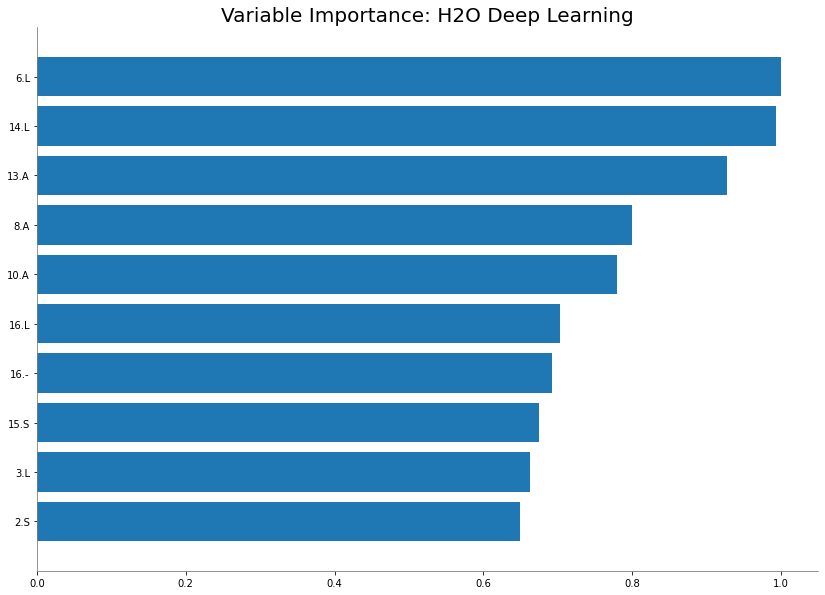

<Figure size 432x288 with 0 Axes>

In [ ]:
best_model.varimp_plot()

In [ ]:
# Retrieve the stored cross-validation (cv) holdout predictions
cv_hold_predictions = best_model.predict(df_test).as_data_frame()
cv_hold_predictions

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,predict
0,0.393251
1,0.383059
2,0.135592
3,0.393251
4,0.078693
...,...
789,0.000720
790,0.000683
791,0.000420
792,0.000490


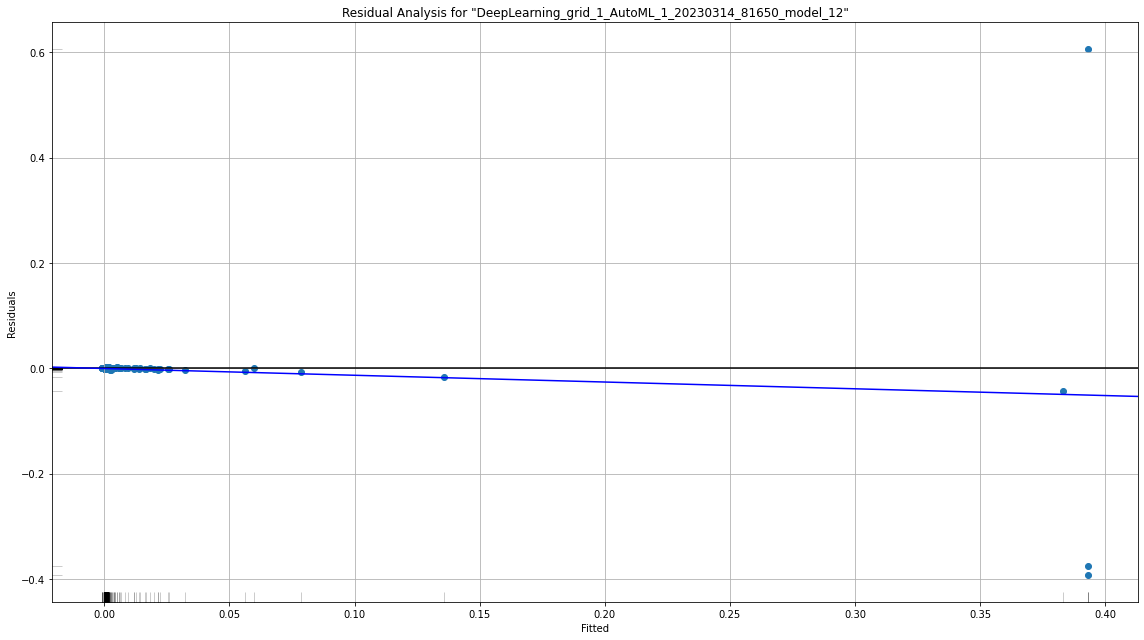

In [ ]:
best_model.residual_analysis_plot(df_test)

In [ ]:
# Convert df_test into a dataframe
df_test_as_df = df_test.as_data_frame()
df_test_as_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,abundance
0,M,M,V,A,W,W,S,L,F,L,...,V,A,A,P,A,L,-,-,-,1.000000
1,M,L,R,V,S,A,I,F,M,A,...,A,T,A,A,-,-,-,-,-,0.339312
2,M,R,F,S,A,I,F,T,L,G,...,A,L,A,T,P,L,V,E,-,0.119362
3,M,M,V,A,W,W,S,L,F,L,...,V,A,A,P,A,L,-,-,-,0.017628
4,M,H,L,P,T,L,V,T,L,A,...,S,A,S,-,-,-,-,-,-,0.071338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,M,Q,V,K,L,F,Y,T,L,A,...,I,L,V,S,-,-,-,-,-,0.000000
790,M,K,S,L,I,W,A,L,P,F,...,Y,-,-,-,-,-,-,-,-,0.000000
791,M,W,P,T,R,S,L,S,S,L,...,L,A,L,G,S,P,V,S,-,0.000000
792,M,L,L,P,R,L,S,S,L,L,...,L,A,T,M,P,V,A,N,-,0.000000


In [ ]:
# Merge the cv holdout predictions together with the df_test abundance
df_signalP_cv_holdout = pd.merge(df_test_as_df, cv_hold_predictions, left_index=True, right_index=True)

# Order the dataframe in the descending order of abundance values
df_signalP_cv_holdout = df_signalP_cv_holdout.sort_values(by= 'abundance', ascending = False)

# Rename the predict column
df_signalP_cv_holdout = df_signalP_cv_holdout.rename(columns={'predict': 'cv_hold_predictions'})

# Reset the indexing of the dataframe
df_signalP_cv_holdout = df_signalP_cv_holdout.reset_index()


In [ ]:
# Generate percentage ranking of the abundance and cv_predictions 
df_signalP_cv_holdout['abundance_ranked_pct'] = df_signalP_cv_holdout['abundance'].rank(pct=True)
df_signalP_cv_holdout['cv_ranked_pct'] = df_signalP_cv_holdout['cv_hold_predictions'].rank(pct=True)
df_signalP_cv_holdout

,index,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,abundance,cv_hold_predictions,abundance_ranked_pct,cv_ranked_pct
0,0,M,M,V,A,W,W,S,L,F,...,P,A,L,-,-,-,1.000000,0.393251,1.000000,0.998741
1,1,M,L,R,V,S,A,I,F,M,...,A,-,-,-,-,-,0.339312,0.383059,0.998741,0.996222
2,2,M,R,F,S,A,I,F,T,L,...,T,P,L,V,E,-,0.119362,0.135592,0.997481,0.994962
3,4,M,H,L,P,T,L,V,T,L,...,-,-,-,-,-,-,0.071338,0.078693,0.996222,0.993703
4,5,M,K,I,S,A,A,I,S,T,...,-,-,-,-,-,-,0.060200,0.059921,0.994962,0.992443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,387,M,L,C,A,L,L,L,S,A,...,-,-,-,-,-,-,0.000000,0.000338,0.384131,0.204030
790,388,M,K,P,I,L,L,A,V,P,...,-,-,-,-,-,-,0.000000,0.000515,0.384131,0.371537
791,389,M,F,G,T,P,L,L,L,L,...,-,-,-,-,-,-,0.000000,0.000640,0.384131,0.497481
792,390,M,I,L,S,T,V,L,S,L,...,-,-,-,-,-,-,0.000000,0.001014,0.384131,0.795970


In [ ]:
# Save the dataframe
df_signalP_cv_holdout.to_csv('/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.3_Cv_holdout_predictions/Third_round/m23_filtered_DeepLearning_grid_1_AutoML_1_20230314_81650_model_12_cv_hold_ranked_pct.csv')

## 5 Visualization of AutoML model

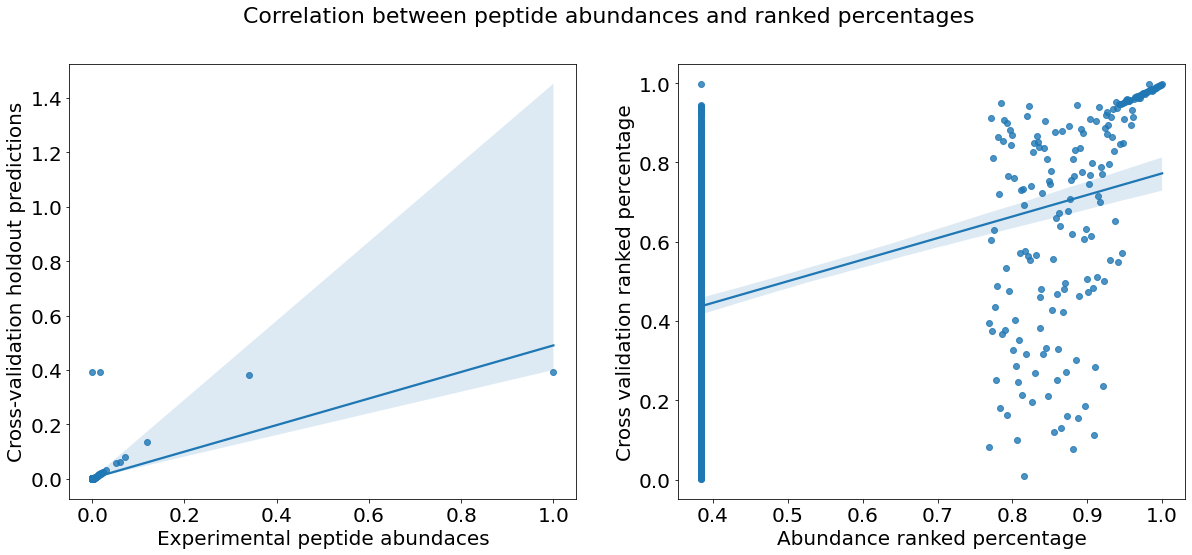

In [ ]:
# Set the font size before creating any plot elements
plt.rc('font', size=20)

# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(ncols=2, figsize=(20, 8))
fig.suptitle('Correlation between peptide abundances and ranked percentages', fontsize=22)

# Left subplot
sns.regplot(x='abundance',y='cv_hold_predictions', data=df_signalP_cv_holdout, ax=axs[0])
axs[0].set_xlabel('Experimental peptide abundaces')
axs[0].set_ylabel('Cross-validation holdout predictions')

# Right subplot
sns.regplot(x='abundance_ranked_pct', y='cv_ranked_pct', data=df_signalP_cv_holdout, ax=axs[1])
axs[1].set_xlabel('Abundance ranked percentage')
axs[1].set_ylabel('Cross validation ranked percentage')

plt.show()

In [ ]:
# Drop rows where NaN values of the peptide abundance was set to 0 to reduce noise (i.e. create a dataframe without (wo) NaN/zero values)
df_signalP_cv_holdout_wo_NaNs = df_signalP_cv_holdout[df_signalP_cv_holdout['abundance'] != 0]
df_signalP_cv_holdout_wo_NaNs

,index,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,abundance,cv_hold_predictions,abundance_ranked_pct,cv_ranked_pct
0,0,M,M,V,A,W,W,S,L,F,...,P,A,L,-,-,-,1.000000,0.393251,1.000000,0.998741
1,1,M,L,R,V,S,A,I,F,M,...,A,-,-,-,-,-,0.339312,0.383059,0.998741,0.996222
2,2,M,R,F,S,A,I,F,T,L,...,T,P,L,V,E,-,0.119362,0.135592,0.997481,0.994962
3,4,M,H,L,P,T,L,V,T,L,...,-,-,-,-,-,-,0.071338,0.078693,0.996222,0.993703
4,5,M,K,I,S,A,A,I,S,T,...,-,-,-,-,-,-,0.060200,0.059921,0.994962,0.992443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,189,M,K,G,L,L,F,V,L,S,...,A,-,-,-,-,-,0.000005,0.000517,0.773300,0.374055
181,181,M,R,G,L,L,L,A,G,A,...,-,-,-,-,-,-,0.000003,0.000740,0.772040,0.603275
182,153,M,H,V,L,S,T,L,T,Q,...,A,A,-,-,-,-,0.000003,0.001495,0.770781,0.913098
183,128,M,R,L,Q,A,F,I,L,V,...,-,-,-,-,-,-,0.000002,0.000533,0.768892,0.394207


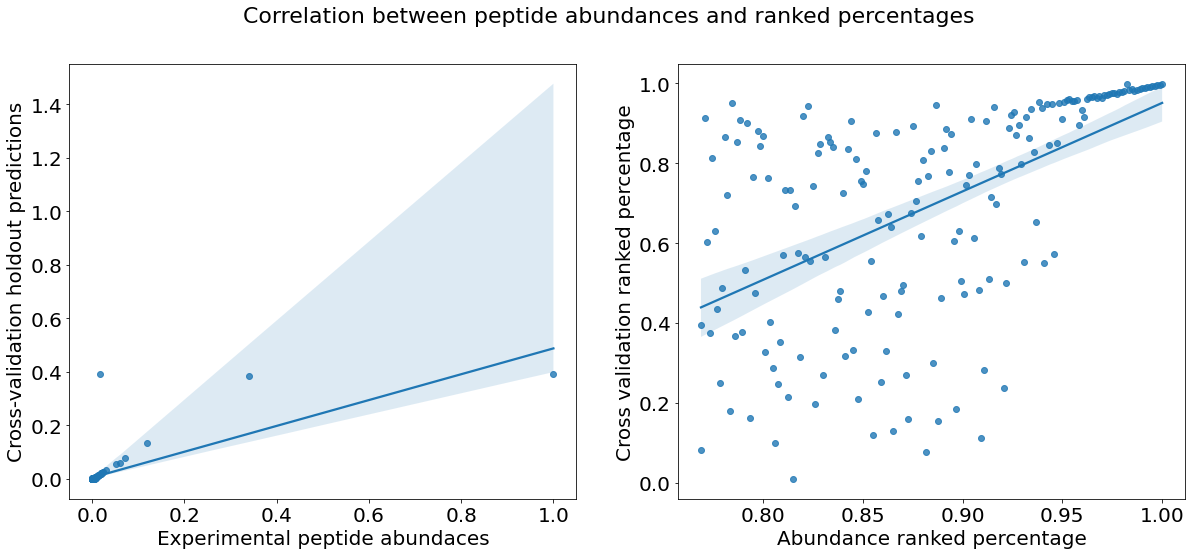

In [ ]:
# Set the font size before creating any plot elements
plt.rc('font', size=20)

# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(ncols=2, figsize=(20, 8))
fig.suptitle('Correlation between peptide abundances and ranked percentages', fontsize=22)

# Left subplot
sns.regplot(x='abundance',y='cv_hold_predictions', data=df_signalP_cv_holdout_wo_NaNs, ax=axs[0])
axs[0].set_xlabel('Experimental peptide abundaces')
axs[0].set_ylabel('Cross-validation holdout predictions')

# Right subplot
sns.regplot(x='abundance_ranked_pct', y='cv_ranked_pct', data=df_signalP_cv_holdout_wo_NaNs, ax=axs[1])
axs[1].set_xlabel('Abundance ranked percentage')
axs[1].set_ylabel('Cross validation ranked percentage')

plt.show()

In [ ]:
# Save the resulting dataframe
df_signalP_cv_holdout_wo_NaNs.to_csv('/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.3_Cv_holdout_predictions/Third_round/m23_filtered_DeepLearning_grid_1_AutoML_1_20230314_81650_model_12_cv_hold_ranked_pct_wo_zeros.csv', index=False)